# Assignment Week 16
## Group Assignment (Group 10)

#### 1. According to the central limit theorem the sum of $N$ random variables $x_{k}$ with means $E_k$ and variances $\sigma_{k}^{2}$ will have a normal distribution with mean $\sum_{k=1}^{N}E_{k}$; and variance $\sigma^{2}=\sum_{k=1}^{N}\sigma_{k}^{2}$, if $N$ is large (theoretically infinite). 
#### A uniform variate between -1 and +1 has a variance of 1/3 so that sums of 27 such deviates should have a normal distribution with mean zero and standard deviation $\sigma=3$.
#### Using a uniform random number generator find 100 000 such sums and find the proportions within $\sigma$, 2$\sigma$ and 3$\sigma$ from the mean. For a normal distribution these should be 0.6826, 0.9545 and 0.9973.
（沈星辰）

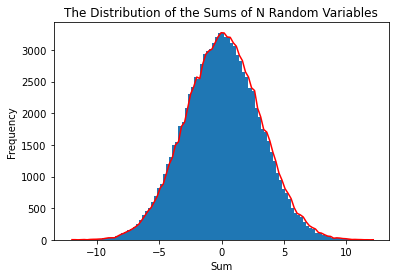

Standard deviation = 3.0
Mean = -0.01
Proportion within 1 sigma = 0.6809
Proportion within 2 sigma = 0.9545
Proportion within 3 sigma = 0.9975


In [1]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
%matplotlib inline

N = 100000  # number of the sums

# generate the sums
x = []
for i in range(N):
    x.append(np.sum(2*random(27) - 1))

# plot the distribution of the sums
plt.title('The Distribution of the Sums of N Random Variables')
plt.hist(x, bins=100)
plt.xlabel('Sum')
plt.ylabel('Frequency')
freq, bins = np.histogram(x, bins=100)
plt.plot(bins[1:], freq, 'r')
plt.show()

# the standard deviation and mean
print('Standard deviation = %.1f' % np.std(x))
print('Mean = %.2f' % np.mean(x))

prop_1s = np.sum(np.abs(x) < 3) / N
prop_2s = np.sum(np.abs(x) < 6) / N
prop_3s = np.sum(np.abs(x) < 9) / N

print('Proportion within 1 sigma = %.4f' % prop_1s)
print('Proportion within 2 sigma = %.4f' % prop_2s)
print('Proportion within 3 sigma = %.4f' % prop_3s)

#### 2. Apply the inverse transformation method to generate a series of random variables $x$ with a distribution function $p(x) = \dfrac{\pi}{ 2} \sin\pi x$ in the range $0 \leq x \leq 1$. Plot the historgram and compare your result with the theoretical value.
（陈张铭，沈星辰）

$$
p(x) = \dfrac{\pi}{2}\sin\pi x,\  0 \leq x \leq 1
$$

$$
\begin{gathered}
y=P(x)=\int_0^x p(\xi)\,{\rm d}\xi =\dfrac{1}{2}(1-\cos\pi x)\\
\Rightarrow x=\dfrac{\arccos(1-2y)}{\pi}
\end{gathered}
$$

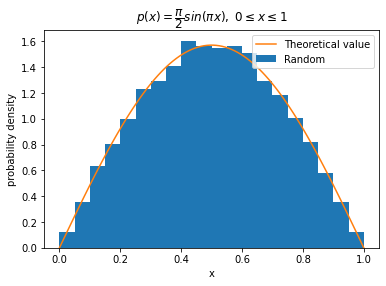

In [2]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
%matplotlib inline

N = 20000

y = random(N)
x = np.arccos(1 - 2 * y) / np.pi

plt.hist(x, bins=20, range=(0, 1), density=True)
z = np.linspace(0, 1, 100)
plt.plot(z, np.pi / 2 * np.sin(np.pi * z))
plt.xlabel('x')
plt.ylabel('probability density')
plt.title(r"$p(x) =\dfrac{\pi}{2}sin(\pi x),\  0 \leq x \leq 1$")
plt.legend(['Theoretical value', 'Random'])
plt.show()

The historgram agrees with the theoretical value.

#### 3. Investigate the behavior of a random walk in which the probabilities for different step directions are not equal. For example, consider a one-dimensional walk with $p_{\text{left}}=0.25$ and $p_{\text{right}}=0.75$. In what sense is the motion still diffusive?
（沈星辰）

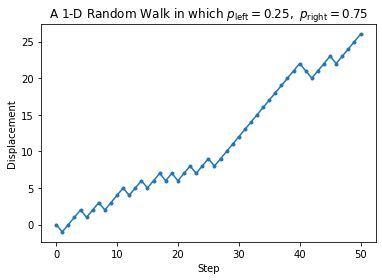

In [3]:
from numpy.random import choice
import matplotlib.pyplot as plt
%matplotlib inline

N = 50
dx = choice([-1, 1], size=N, p=[0.25, 0.75])

x = [0]
for i in range(N):
    x.append(x[-1] + dx[i])

plt.title(r'A 1-D Random Walk in which $p_{\rm left}=0.25,\ p_{\rm right}=0.75$')
plt.plot(x, '.-')
plt.xlabel('Step')
plt.ylabel('Displacement')
plt.show()

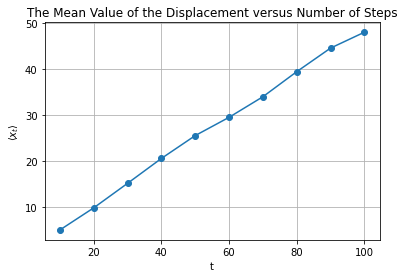

In [4]:
def displacement(N):
    dx = choice([-1, 1], size=N, p=[0.25, 0.75])
    
    x = 0
    for i in range(N):
        x += dx[i]
        
    return x

disp_mean = lambda N: np.array([displacement(N) for i in range(100)]).mean()

N = np.arange(10, 110, 10)
disp = [disp_mean(i) for i in N]

plt.title('The Mean Value of the Displacement versus Number of Steps')
plt.plot(N, disp, 'o-')
plt.xlabel('t')
plt.ylabel(r'$\langle x_t\rangle$')
plt.grid(True)
plt.show()

When $p_{\rm left}\neq p_{\rm right}$, the motion will certainly be diffusive becuase the mean value of the displacement after $t$ steps
$$
\langle x_t\rangle=(p_{\rm right}-p_{\rm left})t\neq 0
$$

#### 4. Write a program to simulate a 2-D random walk.
（陈张铭，沈星辰）
#### (1) To increase the amount of randomness, independently choose random values for $\Delta x^{\prime}$ and $\Delta y^{\prime}$ in the range $\left[
-1,1\right]$. Then normalize them so that each step is of unit length
$$
 \Delta x=\frac{1}{L}\Delta x^{\prime},\text{ }\Delta y=\frac{1}{L}\Delta
y^{\prime},\text{ }L=\sqrt{\Delta x^{\prime2}+\Delta y^{\prime2}}%
$$
#### (2) Using a plotting program to draw maps of several independent random walks, each of 1000 steps. Comment on whether these look like what you would expect of a random walk.

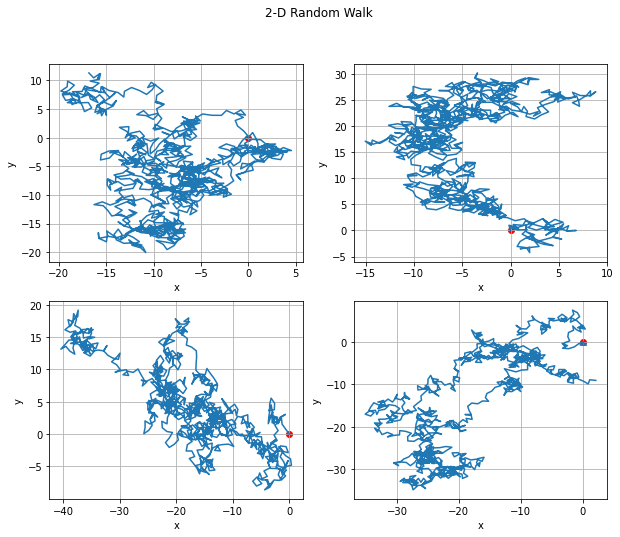

In [5]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
%matplotlib inline

def walk(x, y):
    dx = uniform(-1, 1)
    dy = uniform(-1, 1)
    L = np.sqrt(dx**2 + dy**2)
    dx /= L
    dy /= L
    x = x + dx
    y = y + dy
    return x, y

def plot_random_walk(N=1000):
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    for i in range(1, N+1):
        x[i], y[i] = walk(x[i-1], y[i-1])

    plt.plot(x, y)
    plt.scatter(0, 0, color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

plt.figure(figsize=(10, 8))
plt.suptitle("2-D Random Walk")
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_random_walk()
plt.show()

This is just what random walks should be looked like.

#### (3) If you have your walker taking $N$ steps in a single trial, then conduct a total number $K\simeq\sqrt{N}$ trials. Each trial should have $N$ steps and start with a different seed. 
#### Calculate the mean square distance $R^{2}$ for each trial and then take the average of $R^{2}$ for all your $K$ trials: 
$$
\left\langle R^{2}\left(  N\right)  \right\rangle =\frac{1}{K}\sum_{k=1}%
^{K}R_{\left(  k\right)  }^{2}\left(  N\right)
$$

#### (4) Plot the root-mean-square distance $R_{\text{rms}}=\sqrt{\left\langle R^{2}\left(  N\right)\right\rangle}$ as a function of $\sqrt{N}$. Values of $N$ should start with a small number, where $R\simeq\sqrt{N}$ is not expected to be accurate, and end at a quite large value, where two or three places of accuracy should be expected on the average.

#### (5) Check to see if you obtained the expected statistical "error band" of $\pm\sqrt{R}\simeq N^{1/4}$ for large values of $N$.

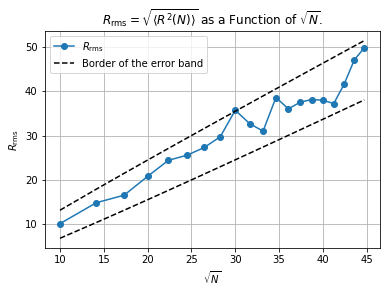

In [6]:
def R_square(N):
    x = 0
    y = 0
    for i in range(N):
        x, y = walk(x, y)
    return x**2 + y**2

def msDistance(N):
    K = int(np.sqrt(N))
    return np.array([R_square(N) for i in range(K)]).mean()

N = np.arange(100, 2100, 100)
R = np.array([np.sqrt(msDistance(i)) for i in N])

plt.title(r'$R_{\rm rms}=\sqrt{\left\langle R^{2}\left(N\right)\right\rangle}$ as a Function of $\sqrt{N}$.')
plt.plot(np.sqrt(N), R, 'o-')
High = N**0.5 + N**0.25
Low = N**0.5 - N**0.25
plt.plot(np.sqrt(N), High, 'k--')
plt.plot(np.sqrt(N), Low, 'k--')
plt.xlabel(r'$\sqrt{N}$')
plt.ylabel(r'$R_{\rm rms}$')
plt.grid(True)
plt.legend([r'$R_{\rm rms}$', 'Border of the error band'])
plt.show()

We obtain the expected statistical "error band" of $\pm\sqrt{R}\simeq N^{1/4}$ for large values of $N$.

#### 5. Imagine a closed box that is divided into two parts of equal volume. The left half contains a gas of $N$ identical particles and the right half is initially empty. We then make a small hole in the partition between the two halves. We know that after some time, the average number of particles in each half of the box will become $N$, and we say that the system has reached equilibrium.
#### Let $n$ be the number of particles in the left part of the box. Because each particle has the same chance to go through the hole, the probability per unit time that a particle moves from left to right equals the number of particles on the left divided by the total number of particles. Write the program so that the following algorithm is implemented:

- **Generate a random number $r$ from a uniformly distributed set of random numbers in the interval $0\leq r <1$**.

- **If $r\leq p=n/N$, move a particle from left to right, that is $n\rightarrow n-1$; otherwise, $n\rightarrow n+1$.**

（沈星辰）

#### (1) Does the time dependence of $n$ appear to be deterministic for sufficient large $N$? 

**Hint**: $n(t)=\dfrac{N}{2}\left(1+e^{-2t/N}\right)$

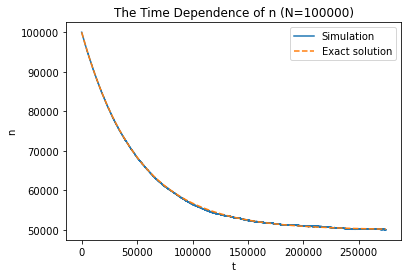

In [7]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
%matplotlib inline

N = 100000

n = [N, N - 1]
t = [0, 1]

while True:
    r = random()
    if r <= n[-1] / N:
        n.append(n[-1] -1)
    else:
        n.append(n[-1]+  1)
    
    t.append(t[-1] + 1)
    
    if n[-1] == int(N / 2):
        break

nf = lambda t: N / 2 * (1 + np.exp(-2 * t / N))

plt.title('The Time Dependence of n (N=%d)' % N)
plt.plot(t, n)
plt.plot(t, nf(np.array(t)), '--')
plt.xlabel('t')
plt.ylabel('n')
plt.legend(['Simulation', 'Exact solution'])
plt.show()

We can see from the plot that the time dependence of $n$ is indeed deterministic for sufficient large $N$.

#### (2) How long does it take for the system to reach equilibrium? How does this time depend on the number of particles? Choose the total number of particles $N$ to be $N=8,16,64,400,800$, and $3600$.

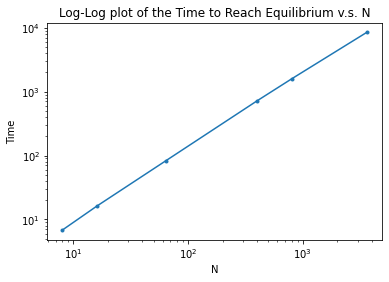

In [8]:
def time_equilibrium(N):
    n = N - 1
    t = 1
    
    while True:
        r = random()
        if r <= n / N:
            n -= 1
        else:
            n += 1
        
        t += 1

        if n == int(N / 2):
            break
    
    return t

t_mean = lambda N: np.mean(np.array([time_equilibrium(N) for i in range(100)]))

N = [8, 16, 64, 400, 800, 3600]
time = [t_mean(i) for i in N]

plt.title('Log-Log plot of the Time to Reach Equilibrium v.s. N')
plt.loglog(N, time, '.-')
plt.xlabel('N')
plt.ylabel('Time')
plt.show()

#### (3) A measure of the equilibrium fluctuations is the mean square fluctuation $\Delta n^2$, which is defined as 
$$
\begin{aligned}
\Delta n^2=\langle (n-\langle n\rangle)^2\rangle=\langle n^2\rangle-\langle n\rangle^2
\end{aligned} 
$$

#### Modify your program so that averages are taken after equilibrium has been reached. Run for a time that is long enough to obtain meaningful results. How does the relative fluctuations, $\Delta n/\langle n\rangle$, depend on $N$?

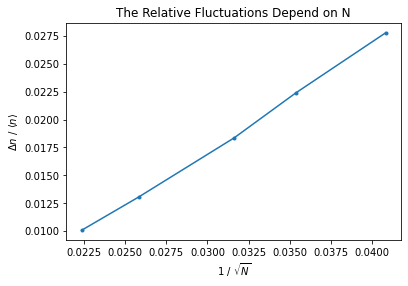

In [9]:
def relative_fluctuations(N):
    n = [int(N / 2)]
    time = 1000

    for i in range(time):
        r = random()
        if r <= n[-1] / N:
            n.append(n[-1] - 1)
        else:
            n.append(n[-1] + 1)

    n = np.array(n)
    n_mean = np.mean(n)
    delta_n_square = np.mean(n**2) - n_mean**2
    delta_n = np.sqrt(delta_n_square)
    fluc = delta_n / n_mean
    
    return fluc

fluc_mean = lambda N: np.mean(np.array([relative_fluctuations(N) for i in range(1000)]))

N = np.array([600, 800, 1000, 1500, 2000])
fluc = np.array([fluc_mean(i) for i in N])

plt.title('The Relative Fluctuations Depend on N')
plt.plot(N**(-0.5), fluc, '.-')
plt.xlabel(r'$1\ /\ \sqrt{N}$')
plt.ylabel(r'$\Delta n\ /\ \langle n \rangle$')
plt.show()

The relative fluctuations $\dfrac{\Delta n}{\langle n\rangle}\sim\dfrac{1}{\sqrt{N}}$.

#### 6. One way to calculate $\pi$ is by randomly throwing a dart into the unit square defined by $x \in [0, 1]$ and $y\in [0, 1]$ in the $xy$ plane. The chance of the dart landing inside the unit circle centered at the origin of the coordinates is $\pi/4$, from the comparison of the areas of one quarter of the circle and the unit square. Write a program to calculate $\pi$ in such a manner.
#### In your program, repeat this experiment many times (meaning many 5000-sample trials, say 1000 such trials) and use your results to estimate the statistical uncertainty (standard deviation of the mean result) in your calculation.
（陈张铭，沈星辰）

In [10]:
import numpy as np
from numpy.random import random
from numpy.linalg import norm

def experiment(N=5000):
    a = random([N, 2])
    j = norm(a, axis=1)
    pi= np.sum(j<1) / N * 4
    return pi

T=1000
pi_s = np.array([experiment() for i in range(T)])

std = np.std(pi_s)

print("The standard deviation =", std)

The standard deviation = 0.023040379316322013
